<a href="https://colab.research.google.com/github/VictorRegueira/VARR_Bourbaki/blob/main/WorkingAnalyst/Mod1/VARR_WorkingAnalyst_Mod1_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working Analyst Módulo I: clasificación
- **Nombre:** Víctor Alejandro Regueira Romero

# Paso 1. Carga de los datos



## Importar librerías

In [120]:
import numpy as np   # Biblioteca para manejar matrices y operaciones de matrices
import pandas as pd  # Biblioteca para manejar tablas de datos.

# Sklearn (Scikit-learn) es la  principal biblioteca para machine learning.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Bibliotecas para gráficar y visualizar.
import matplotlib.pyplot as plt
import seaborn as sns

## Funciones

In [121]:
def describe_datos(df):
    unicos =[]
    for col in df:
        unicos.append(df[col].unique())
    unicos = pd.Series(unicos, index=df.columns)
    descripcion = pd.concat([df.dtypes, df.isna().sum(),df.nunique(),unicos], axis=1)
    descripcion.columns = ['dtypes', 'null','nunique','unique' ]
    return(descripcion)

In [179]:
def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a confusion matrix.

    Args:
        y_true: True labels.
        y_pred: Predicted labels.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

## Cargando archivo raw

In [122]:
# !wget https://github.com/VictorRegueira/VARR_Bourbaki/raw/main/WorkingAnalyst/Mod1/FraudeCanastas.zip
# !unzip FraudeCanastas.zip

In [123]:
df_raw = pd.read_csv('/content/FraudeCanastas.csv')
df_raw.shape

(9319, 2457)

In [124]:
df_raw.head(10)

,ID,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,...,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0,1.0
1,195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0,1.0
2,217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0,1.0
3,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
4,854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0,1.0
5,855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8,9,1263,140.333333,280,4.0,1.0
6,856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,942,471.000000,938,4.0,1.0
7,941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1199,599.500000,1199,0.0,1.0
8,1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
9,1543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,936,468.000000,929,7.0,1.0


# Paso 2. EDA

## Análisis de Nulos

In [125]:
df_raw.isna().sum().sort_values(ascending = False)

,0
ID,0
LIVING DINING FURNITURE | RETAILER | RETAILER DRAPER MEDIUM 2 SEATER SOFA,0
LIVING DINING FURNITURE | RETAILER | RETAILER DRAPER LARGE 3 SEATER LEATHER,0
LIVING DINING FURNITURE | RETAILER | RETAILER DRAPER LARGE 3 SEATER SOFA,0
LIVING DINING FURNITURE | RETAILER | RETAILER DRAPER LARGE 3 SEATER SOFA DAR,0
...,...
COMPUTER PERIPHERALS ACCESSORIES | DELL | DELL KM7120W MULTI-DEVICE WIRELESS KEYBOARD AND MO,0
COMPUTER PERIPHERALS ACCESSORIES | DELL | DELL S2421H FULL HD MONITOR 23 8 PLATINUM SILVER,0
COMPUTER PERIPHERALS ACCESSORIES | DELL | DELL S2721DGFA QUAD HD GAMING MONITOR 27 BLACK,0
COMPUTER PERIPHERALS ACCESSORIES | DELL | DELL S2722QC 4K ULTRA HD MONITOR 27 PLATINUM SILVE,0


In [126]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9319 entries, 0 to 9318
Columns: 2457 entries, ID to fraud_flag
dtypes: float64(2452), int64(5)
memory usage: 174.7 MB


In [127]:
# Calculate the sum of each column in the DataFrame
column_sums = df_raw.sum()

# Identify columns where the sum is zero
zero_sum_columns = column_sums[column_sums == 0].index

# Print the names of the columns with zero sums
print("Columns with zero sum:")
zero_sum_columns


Columns with zero sum:


Index([], dtype='object')

## Verificamos los tipos de datos de las columnas

In [128]:
# Function to get unique counts or total length for numerical columns
def unique_or_len(series):
    return series.nunique()

# Create the summary DataFrame
df_summary = pd.DataFrame({
    'Column': df_raw.columns,
    'Total_Unique_Values': [unique_or_len(df_raw[col]) for col in df_raw.columns],
    'Type': df_raw.dtypes
})

df_summary.reset_index(drop=True, inplace=True)

In [129]:
df_summary.sort_values(by='Total_Unique_Values', ascending=False).head(10)

,Column,Total_Unique_Values,Type
0,ID,9319,int64
2453,costo_medio_item,2034,float64
2452,costo_total,1639,int64
2454,costo_item_max,540,int64
2455,costo_item_min,528,float64
1424,LIVING & DINING FURNITURE | RETAILER | RETAILER,62,float64
2451,total_of_items,34,int64
2450,Nb_of_items,28,int64
879,COMPUTERS | APPLE | 2020 APPLE IPAD AIR 10 9 A...,26,float64
729,COMPUTER PERIPHERALS & ACCESSORIES | APPLE | A...,25,float64


In [130]:
print(df_summary[df_summary['Total_Unique_Values'] > 2].count())

Column                 525
Total_Unique_Values    525
Type                   525
dtype: int64


In [131]:
df_summary[df_summary['Total_Unique_Values'] > 2].sort_values(by='Total_Unique_Values', ascending=False).head(15)

,Column,Total_Unique_Values,Type
0,ID,9319,int64
2453,costo_medio_item,2034,float64
2452,costo_total,1639,int64
2454,costo_item_max,540,int64
2455,costo_item_min,528,float64
1424,LIVING & DINING FURNITURE | RETAILER | RETAILER,62,float64
2451,total_of_items,34,int64
2450,Nb_of_items,28,int64
879,COMPUTERS | APPLE | 2020 APPLE IPAD AIR 10 9 A...,26,float64
729,COMPUTER PERIPHERALS & ACCESSORIES | APPLE | A...,25,float64


In [132]:
df_summary[df_summary['Total_Unique_Values'] == 2].sort_values(by='Total_Unique_Values', ascending=False)

,Column,Total_Unique_Values,Type
1,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,2,float64
1678,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
1632,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
1631,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
1628,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
...,...,...,...
828,COMPUTER PERIPHERALS ACCESSORIES | LACIE | LAC...,2,float64
827,COMPUTER PERIPHERALS ACCESSORIES | LACIE | LAC...,2,float64
826,COMPUTER PERIPHERALS ACCESSORIES | LACIE | LAC...,2,float64
825,COMPUTER PERIPHERALS ACCESSORIES | HP | HP M24...,2,float64


In [133]:
describe_datos(df_raw)

,dtypes,null,nunique,unique
ID,int64,0,9319,"[130, 195, 217, 552, 854, 855, 856, 941, 1157,..."
APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,float64,0,2,"[0.0, 1000.0]"
AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,float64,0,2,"[0.0, 20.0]"
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,float64,0,8,"[0.0, 125.0, 119.0, 120.0, 500.0, 129.0, 109.0..."
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,float64,0,8,"[0.0, 109.0, 100.0, 105.0, 104.0, 99.0, 119.0,..."
...,...,...,...,...
costo_total,int64,0,1639,"[1299, 4119, 2806, 1206, 1807, 1263, 942, 1199..."
costo_medio_item,float64,0,2034,"[649.5, 1373.0, 1403.0, 603.0, 66.925925925925..."
costo_item_max,int64,0,540,"[1299, 2470, 2799, 1199, 195, 280, 938, 929, 1..."
costo_item_min,float64,0,528,"[0.0, 7.0, 4.0, 1249.0, 25.0, 2470.0, 999.0, 1..."


In [134]:
df_raw['LIVING & DINING FURNITURE | RETAILER | RETAILER'].value_counts()

,count
LIVING & DINING FURNITURE | RETAILER | RETAILER,
0.0,9241
1499.0,4
899.0,3
2050.0,3
3198.0,2
...,...
898.0,1
882.0,1
1828.0,1


## Obervaciones:

- 525 de las columnas tienen valores superiores a 2 valores
- Los valores son flotantes o enteros
- Hay 6 variables que muestran estadísticas de costos e items

In [135]:
# Nb_of_items
# total_of_items
# costo_total
# costo_medio_item
# costo_item_max
# costo_item_min

## Análisis de estadísticas

In [136]:
import matplotlib.pyplot as plt

# Select the relevant columns for statistical analysis
cost_columns = ['Nb_of_items', 'total_of_items', 'costo_total', 'costo_medio_item', 'costo_item_max', 'costo_item_min','fraud_flag']
cost_data = df_raw[cost_columns]

# Display descriptive statistics
cost_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Nb_of_items,9319.0,1.774761,1.541868,1.000000,1.0,1.0,2.0,38.0
total_of_items,9319.0,1.856852,1.922323,1.000000,1.0,1.0,2.0,44.0
costo_total,9319.0,1337.801052,1070.597321,219.000000,838.0,1124.0,1612.0,24551.0
costo_medio_item,9319.0,898.376189,734.425487,41.615385,445.5,745.4,1150.0,19999.0
costo_item_max,9319.0,1184.433416,786.942018,130.000000,749.0,1049.0,1415.5,19999.0
costo_item_min,9319.0,647.735165,841.194373,0.000000,7.0,379.0,1099.0,19999.0
fraud_flag,9319.0,0.141539,0.348595,0.000000,0.0,0.0,0.0,1.0


In [137]:
# Calculate the correlation matrix
correlation_matrix = cost_data.corr()

# Get the correlation with 'fraud_flag'
correlation_with_fraud = correlation_matrix['fraud_flag'].abs().sort_values(ascending=False)

# Select the top 20 variables
top_20_correlated = correlation_with_fraud[1:21]  # Exclude 'fraud_flag' itself

top_20_correlated

,fraud_flag
costo_item_max,0.128600
costo_total,0.105138
costo_medio_item,0.103919
costo_item_min,0.049651
total_of_items,0.006276
Nb_of_items,0.004774


## Usando correlación de Funnel

In [138]:
df_binarized = cost_data.binarize()

df_binarized.glimpse()

<class 'pandas.core.frame.DataFrame'>: 9319 rows of 22 columns
Nb_of_items__1.0_2.0:              int64             [1, 0, 1, 1, 0, 0,  ...
Nb_of_items__2.0_38.0:             int64             [0, 1, 0, 0, 1, 1,  ...
total_of_items__1.0_2.0:           int64             [1, 0, 1, 1, 0, 0,  ...
total_of_items__2.0_44.0:          int64             [0, 1, 0, 0, 1, 1,  ...
costo_total__219.0_838.0:          int64             [0, 0, 0, 0, 0, 0,  ...
costo_total__838.0_1124.0:         int64             [0, 0, 0, 0, 0, 0,  ...
costo_total__1124.0_1612.0:        int64             [1, 0, 0, 1, 0, 1,  ...
costo_total__1612.0_24551.0:       int64             [0, 1, 1, 0, 1, 0,  ...
costo_medio_item__41.6_445.5:      int64             [0, 0, 0, 0, 1, 1,  ...
costo_medio_item__445.5_745.4:     int64             [1, 0, 0, 1, 0, 0,  ...
costo_medio_item__745.4_1150.0:    int64             [0, 0, 0, 0, 0, 0,  ...
costo_medio_item__1150.0_19999.0:  int64             [0, 1, 1, 0, 0, 0,  ...
costo_item_ma

In [139]:
df_correlated = df_binarized.correlate(target = 'fraud_flag__1.0')
df_correlated.head(10)

,feature,bin,correlation
21,fraud_flag,1.0,1.000000
20,fraud_flag,0.0,-1.000000
7,costo_total,1612.0_24551.0,0.146722
12,costo_item_max,130.0_749.0,-0.145616
17,costo_item_min,7.0_379.0,-0.128479
4,costo_total,219.0_838.0,-0.128223
8,costo_medio_item,41.6_445.5,-0.127266
15,costo_item_max,1415.5_19999.0,0.123141
16,costo_item_min,0.0_7.0,0.099807
11,costo_medio_item,1150.0_19999.0,0.098580


In [140]:
df_correlated.plot_correlation_funnel()

# Paso 3. Construcción de nuestro clasificador

## Crear conjunto de características y variable objetivo

In [141]:
df_raw['fraud_flag'].value_counts(sort=False, normalize=True)

,proportion
fraud_flag,
1.0,0.141539
0.0,0.858461


Hallazgo: Se encuentra desbalanceado la variable objetivo.

In [142]:
X = df_raw.drop('fraud_flag', axis=1)
X = X.drop('ID', axis=1)
y = df_raw['fraud_flag']

## Crear subconjuntos de entrenamiento y prueba

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [144]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Training set")
print("--------------------------")

print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('Not fraud: ', counts[0],'\nFraud: ', counts[1])

print("\nTest set")
print("--------------------------")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('Not fraud: ', counts[0],'\nFraud: ', counts[1],'\n')

Training set
--------------------------
X:  (7455, 2455)
y:  (7455,)
Not fraud:  6403 
Fraud:  1052

Test set
--------------------------
X:  (1864, 2455)
y:  (1864,)
Not fraud:  1597 
Fraud:  267 



## Entrenamiento modelo base

In [161]:
model = DecisionTreeClassifier(random_state=42, max_depth=3, criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [162]:
# Evaluate the model
print("Decision Tree Accuracy (Training):", model.score(X_train, y_train))
print("Decision Tree Accuracy (Testing):", model.score(X_test, y_test))

Decision Tree Accuracy (Training): 0.8606304493628437
Decision Tree Accuracy (Testing): 0.8572961373390557


## Predicción modelo base

In [ ]:
# prompt: create a function to can use confusion matrix

import matplotlib.pyplot as plt


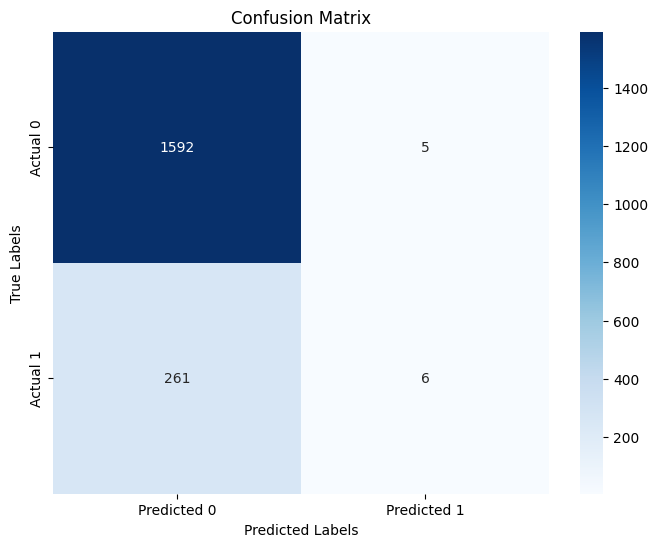

In [181]:
plot_confusion_matrix(y_test, model.predict(X_test))

# Paso 4: Construcción Clasificador final

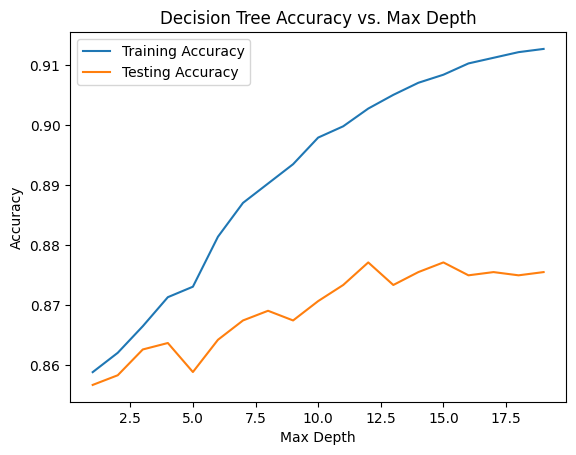

In [186]:
train_accuracies = []
test_accuracies = []
depths = range(1, 20)

for depth in depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


plt.plot(depths, train_accuracies, label="Training Accuracy")
plt.plot(depths, test_accuracies, label="Testing Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Max Depth")
plt.legend()
plt.show()


## Grid Search

Best parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.8794097920858484
Test set accuracy: 0.875


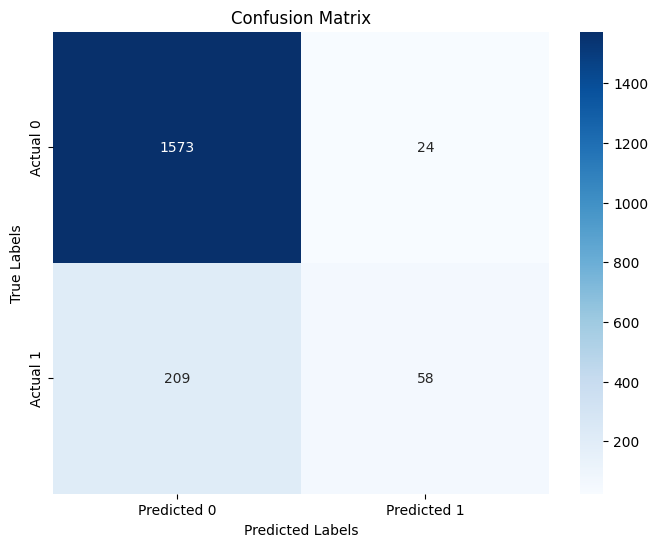

In [185]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'criterion': ['entropy', 'gini']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
print("Test set accuracy:", best_model.score(X_test, y_test))

plot_confusion_matrix(y_test, best_model.predict(X_test))


Observaciones:
- Al final he decidido quedarme por el modelo base, el cuál presentó similares resultados en la métrica de accuracy (exactitud), pero no tuve que modificar los hiperparámetros siguiendo alguna hipótesis.

- El mejor valor para la profundidad (max_depth=12)

In [150]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=12)  # You can adjust hyperparameters here
clf.fit(X_train, y_train)

# Evaluate the model
print("Decision Tree Accuracy (Training):", clf.score(X_train, y_train))
print("Decision Tree Accuracy (Testing):", clf.score(X_test, y_test))

Decision Tree Accuracy (Training): 0.9027498323272971
Decision Tree Accuracy (Testing): 0.8771459227467812


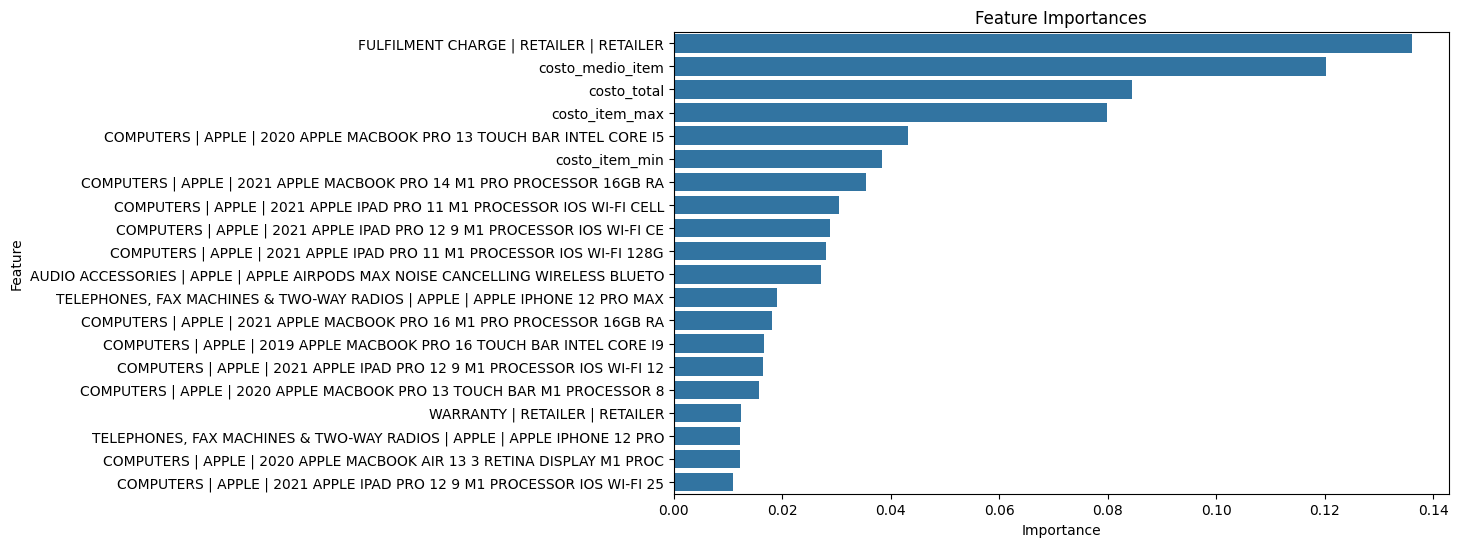

In [152]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:20], y=X_train.columns[indices][:20])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Curva ROC_AUC

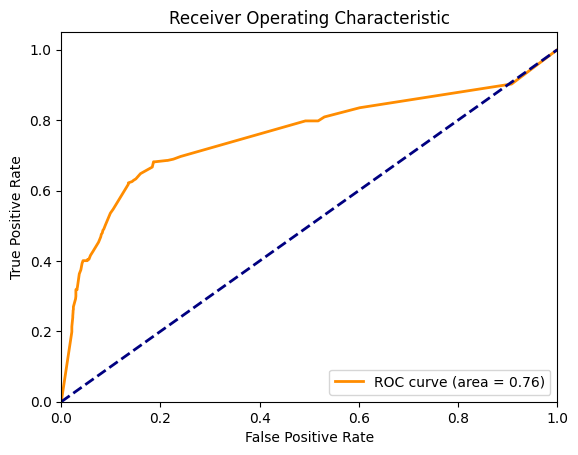

In [154]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Aplico Cross Validation

In [153]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc'}

cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

print("\nDetailed Cross-validation results:")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
      print(f"{metric}: {scores}")
      print(f"Mean {metric}: {np.mean(scores)}")
      print(f"Standard Deviation {metric}: {np.std(scores)}")


Detailed Cross-validation results:
test_accuracy: [0.85944206 0.875      0.86319742 0.8444206  0.85131508]
Mean test_accuracy: 0.8586750338072102
Standard Deviation test_accuracy: 0.01043937357588288
test_roc_auc: [0.66116714 0.78077296 0.70330374 0.6800367  0.61847671]
Mean test_roc_auc: 0.6887514501598687
Standard Deviation test_roc_auc: 0.053768221548240076


Obervaciones:
- Los valores alcanzados son estables y me permiten tener un modelo estable, aunque no el mejor. Se podrían incrementar los valores usando técnicas más avanzadas o modelos más adhoc para este tipo de casos.

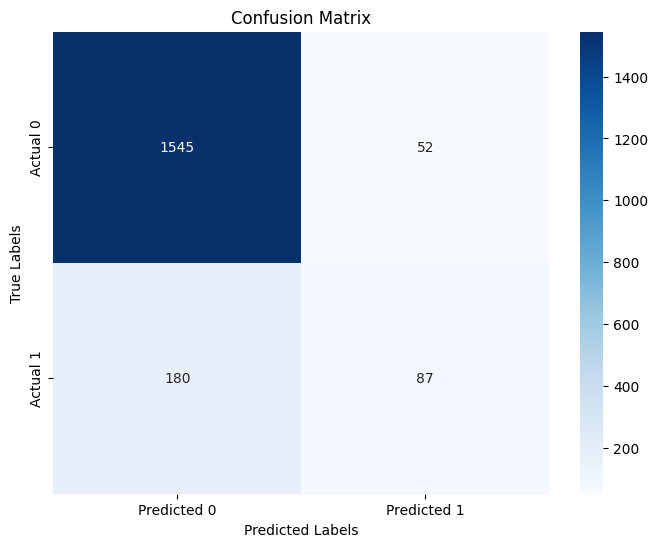

In [212]:
from sklearn.metrics import confusion_matrix
# Make predictions
y_pred = clf.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

Obervaciones:
- La tasa de **FP es alta**, y para temas de fraude es nuestro peor escenario.
- Ajustaré el umbral de probabilidades para hacer un modelo más robusto a la predicción del fraude.

## Estableciendo un mejor umbral

### Probabilidad actual

In [188]:
y_pred_proba = clf.predict_proba(X_test)
# Create a DataFrame from y_pred_proba
proba_df = pd.DataFrame(y_pred_proba, columns=['Not Fraud(0)', 'Fraud(1)'])

# Display the DataFrame
proba_df

,Not Fraud(0),Fraud(1)
0,0.943018,0.056982
1,0.595238,0.404762
2,0.943018,0.056982
3,0.653846,0.346154
4,0.988276,0.011724
...,...,...
1859,1.000000,0.000000
1860,0.000000,1.000000
1861,0.632653,0.367347
1862,0.988276,0.011724


### Estableciendo un mejor umbral para mitigar los FP

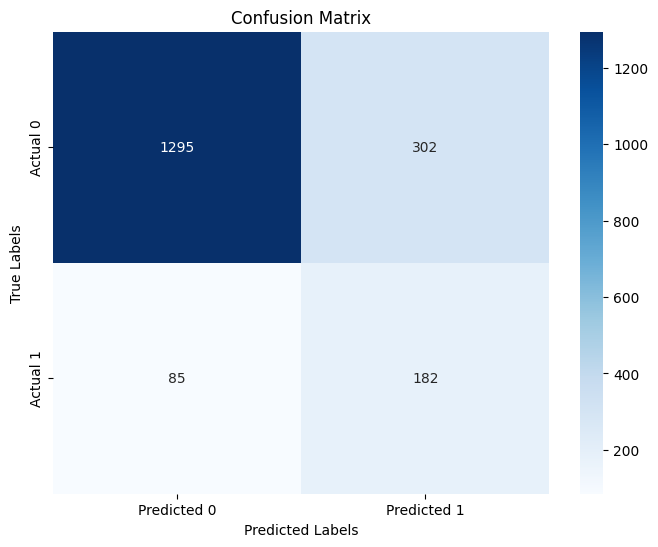

In [216]:
umbral = 0.12
prediccion_test = np.where( clf.predict_proba(X_test)[:, 1] > umbral, True, False)
plot_confusion_matrix(y_test, prediccion_test)